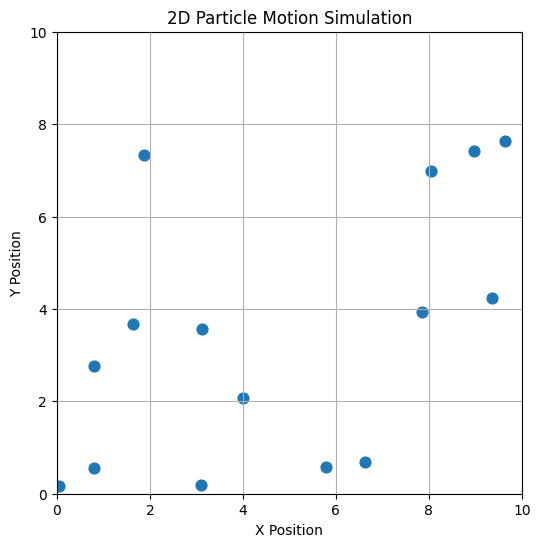

In [6]:
# ============================================================
# 2D PHYSICS SIMULATION – PARTICLE MOTION
# FINAL MAJOR PROJECT (JUPYTER NOTEBOOK SAFE)
# ============================================================
# Author        : Robin
# Libraries     : NumPy, Matplotlib ONLY
# Description   :
# This project simulates particles moving in 2D space
# under gravity and bouncing from walls.
# ============================================================

# -------------------------------
# IMPORT LIBRARIES
# -------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# -------------------------------
# NOTEBOOK SAFE SETTING
# -------------------------------
# This avoids IPython / JavaScript errors
# Works in Jupyter Notebook, VS Code, everywhere
%matplotlib inline

# -------------------------------
# SIMULATION SETTINGS
# -------------------------------
num_particles = 15      # Number of particles
width, height = 10, 10  # Simulation area
dt = 0.1                # Time step
gravity = np.array([0, -0.4])  # Downward gravity

# -------------------------------
# INITIALIZE PARTICLES
# -------------------------------
# Random positions inside box
positions = np.random.rand(num_particles, 2) * [width, height]

# Random velocities
velocities = (np.random.rand(num_particles, 2) - 0.5) * 4

# Same acceleration for all particles
accelerations = np.tile(gravity, (num_particles, 1))

# -------------------------------
# CREATE FIGURE
# -------------------------------
fig, ax = plt.subplots(figsize=(6, 6))
scatter = ax.scatter(positions[:, 0], positions[:, 1], s=60)

ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_title("2D Particle Motion Simulation")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.grid(True)

# -------------------------------
# UPDATE FUNCTION
# -------------------------------
def update(frame):
    global positions, velocities

    # Update velocity (v = v + a * t)
    velocities += accelerations * dt

    # Update position (x = x + v * t)
    positions += velocities * dt

    # Wall collisions
    for i in range(num_particles):
        if positions[i, 0] <= 0 or positions[i, 0] >= width:
            velocities[i, 0] *= -1

        if positions[i, 1] <= 0 or positions[i, 1] >= height:
            velocities[i, 1] *= -1

    # Update scatter plot
    scatter.set_offsets(positions)
    return scatter,

# -------------------------------
# CREATE ANIMATION
# -------------------------------
anim = FuncAnimation(
    fig,
    update,
    frames=300,
    interval=50
)

# -------------------------------
# SHOW OUTPUT
# -------------------------------
plt.show()
